In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import pamtraRadarSimulator

%matplotlib inline


Define variables, not very realistic ones!

In [2]:

edr = 1e-4
wind_uv = 10
height = 1000
beamwidth_deg = 1
integration_time = 3
frequency = 30.
kolmogorov = 0.5

diameter_spec = np.logspace(-3,-2.9,30)
back_spec = np.logspace(-20,-10,30)
back = np.sum(back_spec)
pia = 0
temp = 300
press = 10000
hgt = 1000
wind_w = 0
rho_particle = np.ones(30)*100
mass = np.ones(30)*0.0001
area = np.ones(30)*0.0001



Estimate the broadening of the spectrum

In [3]:

specBroadening = pamtraRadarSimulator.calcSpectralBraodening(edr,
wind_uv,
height,
beamwidth_deg,
integration_time,
frequency,
kolmogorov=kolmogorov)
specBroadening


array(0.09468504367728965)

Now, we can simulate the spectrum itself

In [4]:

spec = pamtraRadarSimulator.simulateRadarSpectrum(
  np.array([diameter_spec]),
  np.array([back_spec]),
  np.array([mass]),
  np.array([rho_particle]),
  np.array([area]),
  pia,
  hgt,
  temp,
  press,
  wind_w,
  frequency,
  specBroadening,
  vel_size_mod ='heymsfield10_particles',
  radar_max_v =7.885,
  radar_min_v =-7.885,
  radar_aliasing_nyquist_interv = 10,
  radar_nfft = 256,
  radar_airmotion = False,
  radar_airmotion_model = "step", #"constant","linear","step"
  radar_airmotion_vmin = -4.0,
  radar_airmotion_vmax = +4.0,
  radar_airmotion_linear_steps = 30,
  radar_airmotion_step_vmin = 0.5,
  radar_pnoise1000 = -30,
  radar_k2 =0.93, # dielectric constant |K|² (always for liquid water by convention) for the radar equation
  radar_no_ave = 150,
  seed  = 1,
  verbosity = 0
      )

Plot result

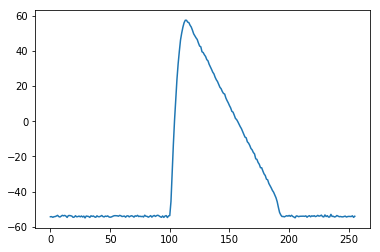

In [5]:
plt.plot(10*np.log10(spec))